<a href="https://colab.research.google.com/github/Colsai/Small-Assignments/blob/main/Pythagorean_projection_nfl_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pythagorean Expected Win =
Points for ** 2.37 / Points for ** 2.37 - Points allowed ** 2.37

In [110]:
#Scored Points thus far
points_for = 349
points_allowed = 237

#Exponents and number of games
exp = 2.37
number_games = 16

#Formula
expected_win_pct = (points_for**exp) / (points_for**exp + points_allowed**exp)
expected_season_wins = round(number_games * expected_win_pct)

#Print Result
print(f"{expected_win_pct}% and {expected_season_wins} wins")

0.7144748989813078% and 11 wins


#Import Data

In [111]:
#Read the dataframe
df = pd.read_html('https://www.nfl.com/standings/division/2020/reg/')

In [112]:
#How many tables did we collect?
len(df)

8

And the first table is...

In [113]:
df[0].head()

,NFC WEST,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5
0,Seattle Seahawks x Seahawks x,10,4,0,0.714,413,339,74,6 - 1 - 0,4 - 3 - 0,2 - 2 - 0,0.5,7 - 3 - 0,0.7,3 - 1 - 0,2W,4 - 1 - 0
1,Los Angeles Rams Rams,9,5,0,0.643,345,269,76,5 - 2 - 0,4 - 3 - 0,2 - 2 - 0,0.5,8 - 2 - 0,0.8,1 - 3 - 0,1L,3 - 2 - 0
2,Arizona Cardinals Cardinals,8,6,0,0.571,391,329,62,4 - 3 - 0,4 - 3 - 0,2 - 2 - 0,0.5,6 - 4 - 0,0.6,2 - 2 - 0,2W,2 - 3 - 0
3,San Francisco 49ers 49ers,5,9,0,0.357,333,352,-19,1 - 6 - 0,4 - 3 - 0,2 - 2 - 0,0.5,3 - 7 - 0,0.3,2 - 2 - 0,3L,1 - 4 - 0


Right now, I just want to focus on the AFC North
(Pittsburg, Baltimore, Cleveland, Cincinatti)

In [114]:
nfl_df = []

for table in df:
    nfl_df.append(table)

In [115]:
total_df = pd.concat([df[0],df[1],df[2],df[3],df[4]], ignore_index=True, sort=False)

In [116]:
total_df

,NFC WEST,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5,NFC SOUTH,NFC EAST,NFC NORTH,AFC EAST
0,Seattle Seahawks x Seahawks x,10,4,0,0.714,413,339,74,6 - 1 - 0,4 - 3 - 0,2 - 2 - 0,0.50,7 - 3 - 0,0.700,3 - 1 - 0,2W,4 - 1 - 0,NaN,NaN,NaN,NaN
1,Los Angeles Rams Rams,9,5,0,0.643,345,269,76,5 - 2 - 0,4 - 3 - 0,2 - 2 - 0,0.50,8 - 2 - 0,0.800,1 - 3 - 0,1L,3 - 2 - 0,NaN,NaN,NaN,NaN
2,Arizona Cardinals Cardinals,8,6,0,0.571,391,329,62,4 - 3 - 0,4 - 3 - 0,2 - 2 - 0,0.50,6 - 4 - 0,0.600,2 - 2 - 0,2W,2 - 3 - 0,NaN,NaN,NaN,NaN
3,San Francisco 49ers 49ers,5,9,0,0.357,333,352,-19,1 - 6 - 0,4 - 3 - 0,2 - 2 - 0,0.50,3 - 7 - 0,0.300,2 - 2 - 0,3L,1 - 4 - 0,NaN,NaN,NaN,NaN
4,NaN,10,4,0,0.714,397,297,100,5 - 2 - 0,5 - 2 - 0,5 - 0 - 0,1.00,8 - 2 - 0,0.800,2 - 2 - 0,2L,3 - 2 - 0,New Orleans Saints x Saints x,NaN,NaN,NaN
5,NaN,9,5,0,0.643,401,321,80,4 - 3 - 0,5 - 2 - 0,3 - 2 - 0,0.60,6 - 4 - 0,0.600,3 - 1 - 0,2W,3 - 2 - 0,Tampa Bay Buccaneers Buccaneers,NaN,NaN,NaN
6,NaN,4,10,0,0.286,355,353,2,2 - 6 - 0,2 - 4 - 0,1 - 4 - 0,0.20,2 - 9 - 0,0.182,2 - 1 - 0,3L,1 - 4 - 0,Atlanta Falcons Falcons,NaN,NaN,NaN
7,NaN,4,10,0,0.286,323,356,-33,2 - 5 - 0,2 - 5 - 0,1 - 4 - 0,0.20,3 - 7 - 0,0.300,1 - 3 - 0,3L,1 - 4 - 0,Carolina Panthers Panthers,NaN,NaN,NaN
8,NaN,6,8,0,0.429,302,295,7,3 - 4 - 0,3 - 4 - 0,3 - 2 - 0,0.60,4 - 6 - 0,0.400,2 - 2 - 0,1L,4 - 1 - 0,NaN,Washington Football Team Washington,NaN,NaN
9,NaN,5,9,0,0.357,339,433,-94,3 - 4 - 0,2 - 5 - 0,1 - 3 - 0,0.25,4 - 6 - 0,0.400,1 - 3 - 0,2W,3 - 2 - 0,NaN,Dallas Cowboys Cowboys,NaN,NaN


In [117]:
nfl_df

[                           NFC WEST   W  L  T  ...  Pct.1   Non-Conf  Strk     Last 5
 0  Seattle Seahawks  x  Seahawks  x  10  4  0  ...    0.7  3 - 1 - 0    2W  4 - 1 - 0
 1            Los Angeles Rams  Rams   9  5  0  ...    0.8  1 - 3 - 0    1L  3 - 2 - 0
 2      Arizona Cardinals  Cardinals   8  6  0  ...    0.6  2 - 2 - 0    2W  2 - 3 - 0
 3        San Francisco 49ers  49ers   5  9  0  ...    0.3  2 - 2 - 0    3L  1 - 4 - 0
 
 [4 rows x 17 columns],
                           NFC SOUTH   W   L  ...   Non-Conf  Strk     Last 5
 0  New Orleans Saints  x  Saints  x  10   4  ...  2 - 2 - 0    2L  3 - 2 - 0
 1  Tampa Bay Buccaneers  Buccaneers   9   5  ...  3 - 1 - 0    2W  3 - 2 - 0
 2          Atlanta Falcons  Falcons   4  10  ...  2 - 1 - 0    3L  1 - 4 - 0
 3       Carolina Panthers  Panthers   4  10  ...  1 - 3 - 0    3L  1 - 4 - 0
 
 [4 rows x 17 columns],
                                NFC EAST  W  L  ...   Non-Conf  Strk     Last 5
 0  Washington Football Team  Washington  6

In [118]:
#Set the table as the df
an_df = df[6][["AFC NORTH", "W", "L", "T", "PCT", "PF", "PA", "Net Pts"]]
an_df

,AFC NORTH,W,L,T,PCT,PF,PA,Net Pts
0,Pittsburgh Steelers x Steelers x,11,2,0,0.846,349,237,112
1,Cleveland Browns Browns,10,4,0,0.714,368,374,-6
2,Baltimore Ravens Ravens,9,5,0,0.643,403,287,116
3,Cincinnati Bengals Bengals,2,10,1,0.192,244,338,-94


In [119]:
def expected_wins(dataframe):
    pf = dataframe['PF'].to_list()
    pa = dataframe['PA'].to_list()

    exp_win = []
    total_expected = []

    for i in range(0,4):
        expected = (pf[i]**2.37)/(pf[i]**2.37+pa[i]**2.37)
        total_expected.append(round(expected*16,3))
        exp_win.append(expected)
    
    dataframe.insert(5,"Expected Total Wins", total_expected)
    dataframe.insert(6,"Expected Win %", exp_win)

In [120]:
expected_wins(an_df)

In [121]:
an_df

,AFC NORTH,W,L,T,PCT,Expected Total Wins,Expected Win %,PF,PA,Net Pts
0,Pittsburgh Steelers x Steelers x,11,2,0,0.846,11.432,0.714475,349,237,112
1,Cleveland Browns Browns,10,4,0,0.714,7.847,0.490419,368,374,-6
2,Baltimore Ravens Ravens,9,5,0,0.643,11.055,0.690938,403,287,116
3,Cincinnati Bengals Bengals,2,10,1,0.192,5.056,0.315975,244,338,-94


In [122]:
an_df

,AFC NORTH,W,L,T,PCT,Expected Total Wins,Expected Win %,PF,PA,Net Pts
0,Pittsburgh Steelers x Steelers x,11,2,0,0.846,11.432,0.714475,349,237,112
1,Cleveland Browns Browns,10,4,0,0.714,7.847,0.490419,368,374,-6
2,Baltimore Ravens Ravens,9,5,0,0.643,11.055,0.690938,403,287,116
3,Cincinnati Bengals Bengals,2,10,1,0.192,5.056,0.315975,244,338,-94


TypeError: ignored

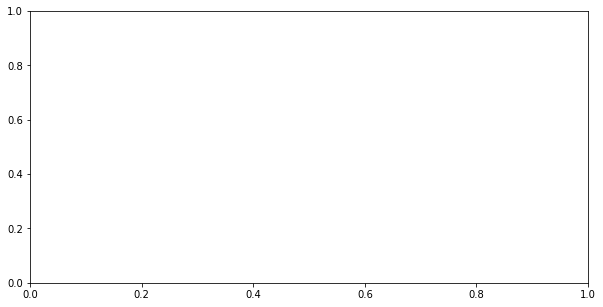

In [127]:
#Basic Plotting of All Things
team = an_df["AFC NORTH"]
pct = an_df["PCT"]
exp_win = an_df["Expected Win %"]

fig, ax = plt.subplots(1, figsize = (10,5))

ax.bar(team +.15, exp_win, width = .3,  alpha = .5, color = "purple", label = "Offensive Points Rank")
ax.bar(team -.15, exp_win, width = .3, alpha = .5, color = "black", label = "Defensive Yards Rank")

ax.legend()
ax.set_title(f"Baltimore Ravens Seasons Offense (1996-Present)", fontsize = 14)
ax.grid(which = 'both', alpha = .5, color='black', linestyle='-', linewidth=.5)
ax.set_xlabel("Rank (Lower is Better)", labelpad=15, fontsize=12, color="#333533")
ax.set_ylabel("Years", labelpad=15, fontsize=12, color="#333533")

In [123]:
def expected_wins(dataframe):
    win_chance = [0]

    for element in dataframe:
        expected_wins = (element['PF'] ** 2.37) / (element['PF']**2.37 - element['PA']**2.37)
        win_chance.append(expected_wins)

    dataframe.insert(5, "Expected Wins", win_chance)